
Fais tes modifs.

git add .

git commit -m "mon message"

git push origin main (ça envoie sur ton GitHub).

puis faire le pull recuest

Et pour récupérer le travail : git pull upstream main.

In [123]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
import time


pi = np.pi
def cos(x: float) ->float:
    return np.cos(x)
def sin(x: float) ->float:
    return np.sin(x)

# Le problème

$-\frac{d}{dx}(D(x)\frac{du}{dx})=f(x)$  $ 

$u(0)=u_0$

$u(1)=u_1$

In [124]:
def D(x:float) -> float:
    return 1 + sin(x)/2

In [125]:
def f(x:float) -> float:
    return pi*cos(x)*sin(2*pi*x)+4*pi*pi*(1 + sin(x)/2)*cos(2*pi*x)

## Les conditions aux limites 

In [126]:
u0 = 1
u1 = 1

## La solution Exact

In [127]:
def u_solution(x: float) -> float :
    return cos(2*pi*x)

# Discrétisation du problème

Posons le problème sous la forme AU = F

In [128]:
def A_constructor(N: int, D: Callable[[float], float]) -> np.ndarray :
    h = 1/N
    A = np.zeros((N-1, N-1), float)
    for i in range(N-1):
        for j in range(N-1):
            if i == j :
                A[i][j] = N*N*(D((i+1/2)*h) + D((i-1/2)*h))
            elif i + 1 == j :
                A[i][j] = -N*N*D((i+1/2)*h)
            elif i - 1 == j :
                A[i][j] = -N*N*D((i-1/2)*h)
            else :
                A[i][j] = 0
    return A


In [129]:
def F_constructor(N: int, f: Callable[[float], float], D: Callable[[float], float], u0: float, u1: float) -> np.ndarray :
    h = 1/N
    F = np.zeros((N-1), float)
    for i in range(N-1):
        F[i] = f((i+1)*h)
        if i == 0 :
            F[i] += N*N*D(1/(2*N))*u0
        elif i == N-2 :
            F[i] += N*N*D(((2*N-1)/(2*N)))*u1
    return F

* Puis on inverse A pour trouver U
* Et on essaye pour differente valeure de N
* Et enfin on trace l'erreur relative a la norme L2 comme fonction de N

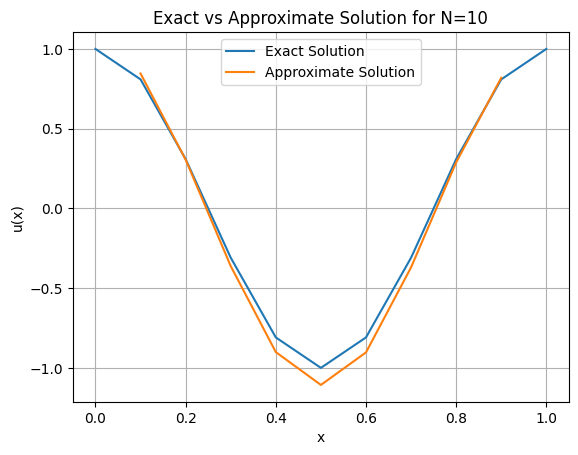

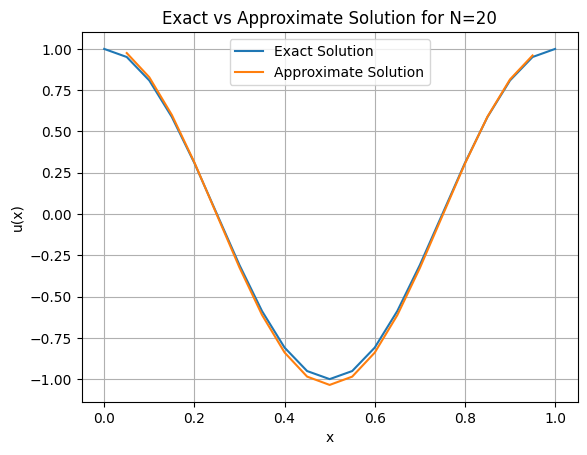

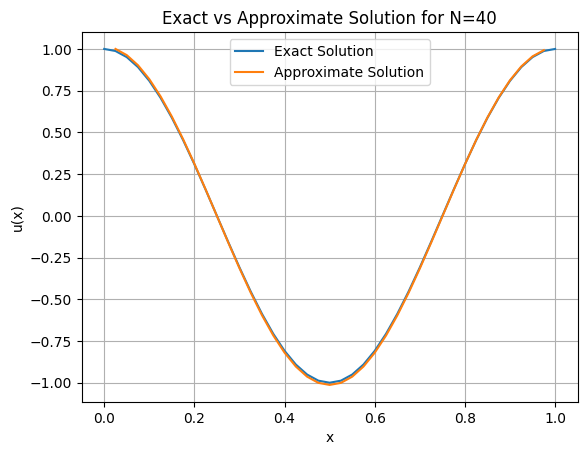

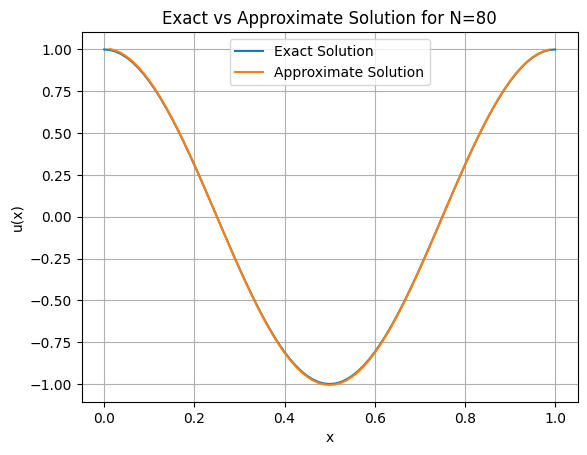

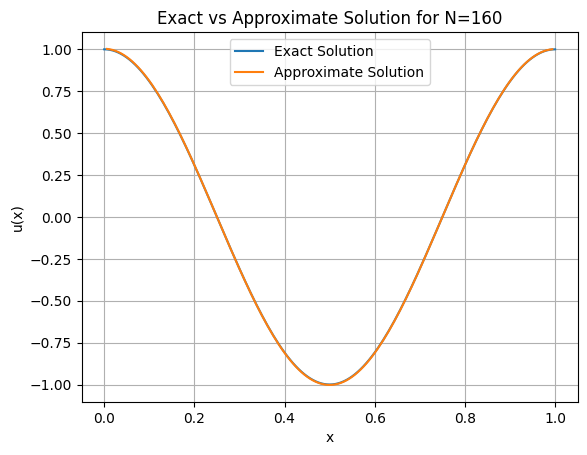

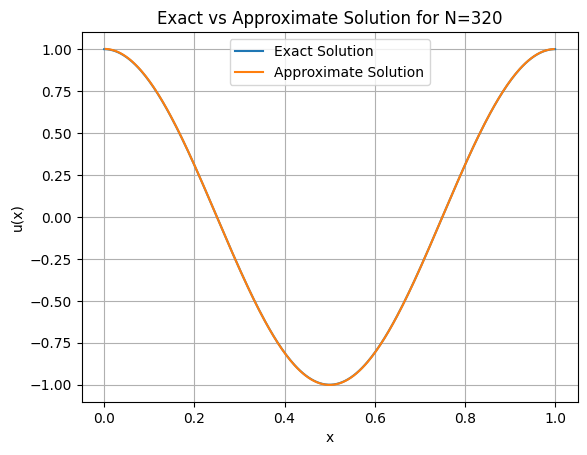

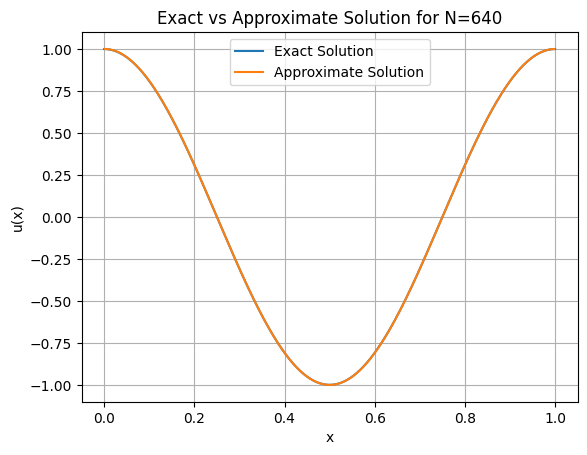

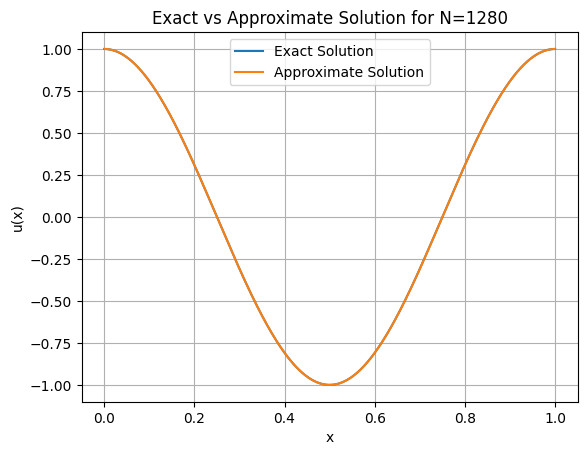

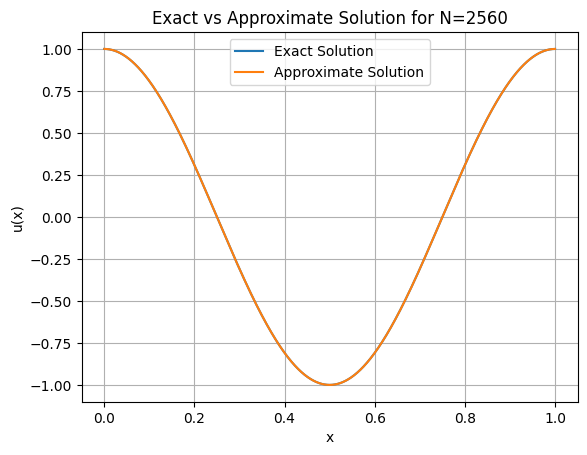

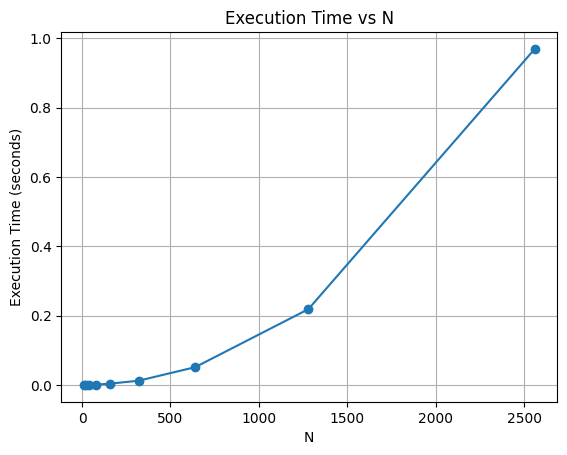

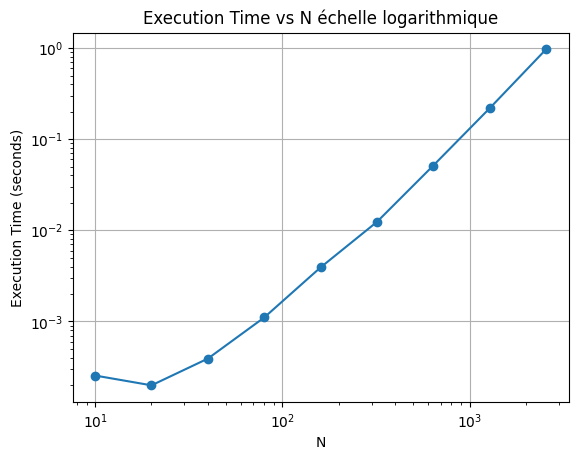

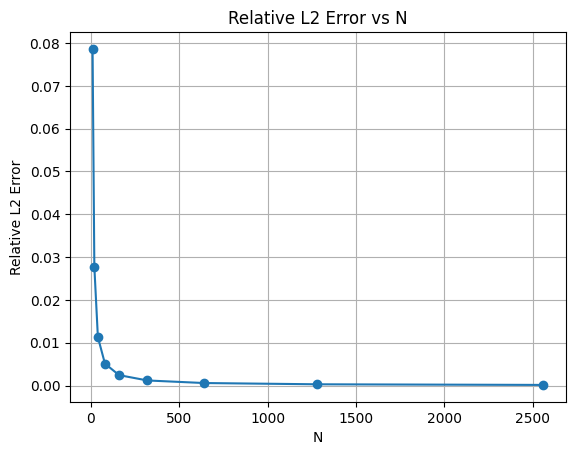

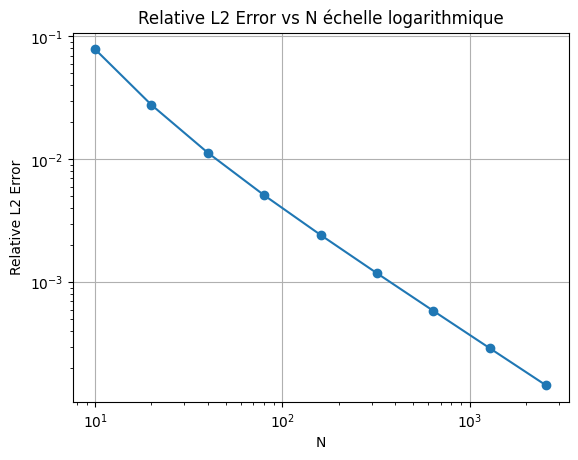

In [130]:
N_values = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]
errors = []
duree = []
for N in N_values:
    start_time = time.time()
    A = np.array(A_constructor(N, D), dtype=float)
    F = np.array(F_constructor(N, f, D, u0, u1), dtype=float)
    u_approx = np.linalg.solve(A, F)
    x_values = [(i)/N for i in range(N+1)]
    u_exact = [u_solution(x) for x in x_values]
    error2 = np.sqrt(sum([(u_approx[i-1] - u_exact[i])**2 for i in range(1, N)]))/np.sqrt(sum([u_exact[i]**2 for i in range(N+1)]))
    errors.append(error2)
    duree.append(time.time() - start_time)
    plt.plot(x_values, u_exact, label='Exact Solution')
    plt.plot(x_values[1:N], u_approx, label='Approximate Solution')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title(f'Exact vs Approximate Solution for N={N}')
    plt.legend()
    plt.grid()
    plt.show()
plt.plot(N_values, duree, marker='o')
plt.xlabel('N')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs N')
plt.grid()
plt.show()
plt.loglog(N_values, duree, marker='o')
plt.xlabel('N')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs N échelle logarithmique')
plt.grid()
plt.show()
plt.plot(N_values, errors, marker='o')
plt.xlabel('N')
plt.ylabel('Relative L2 Error')
plt.title('Relative L2 Error vs N')
plt.grid()
plt.show()
plt.loglog(N_values, errors, marker='o')
plt.xlabel('N')
plt.ylabel('Relative L2 Error')
plt.title('Relative L2 Error vs N échelle logarithmique')
plt.grid()
plt.show()


# Deuxième cas test (maintenant paramétrique)

$D_{\mu}= 1 + \mu_D$

$f_{\mu}(x) = \mu_1 sin(\pi x) + \mu_2 sin(2\pi x)$

$u(0)= u_0 ~~~ u(1)=u_1 ~~~ x \in (0, 1)$


In [131]:
u0 = 0
u1 = 0

In [132]:
def D_mu(x: float, muD: float) -> float:
    return 1 + muD
def D0(x: float) -> float:
    return D_mu(x, 0)

In [133]:
def f_mu(x: float, mu1: float, mu2: float) -> float:
    return mu1*sin(pi*x) + mu2*sin(2*pi*x)
def f1(x: float) -> float:
    return f_mu(x, 1, 0)
def f2(x: float) -> float:
    return f_mu(x, 0, 1)

In [134]:
def u_exact(x: float, mu1: float, mu2: float, muD: float) -> float:
    return (mu1*sin(pi*x) + mu2/4*sin(2*pi*x))/(pi*pi*(1 + muD))

In [135]:
N=1280
A0 = A_constructor(N, D0)
F1 = F_constructor(N, f1, D0, u0, u1)
F2 = F_constructor(N, f2, D0, u0, u1)


In [136]:
N_s_moins3=2
U_snapshot = np.zeros((N-1, N_s_moins3**3), float)
i=0
for muD in [0.1 + 0.9*i/(N_s_moins3-1) for i in range(N_s_moins3)]:
    for mu1 in [1 + 9*i/(N_s_moins3-1) for i in range(N_s_moins3)]:
        for mu2 in [1 + 9*i/(N_s_moins3-1) for i in range(N_s_moins3)]:
            A = (1 + muD)*A0
            F = mu1*F1 + mu2*F2
            u_approx = np.linalg.solve(A, F)
            U_snapshot[:, i] = u_approx
            i+=1


# Décomposition en SVD

Singular values: 8


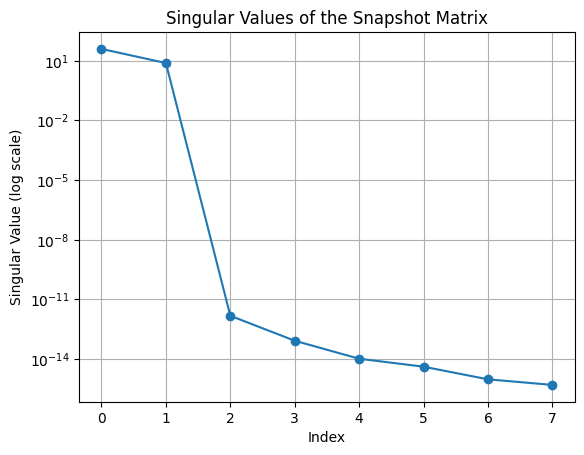

In [137]:
(V, S, U) = np.linalg.svd(U_snapshot)
print("Singular values:", len(S))
plt.semilogy(S, marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')
plt.title('Singular Values of the Snapshot Matrix')
plt.grid()
plt.show()

# Un premier test


In [138]:
muD = 0.5
mu1 = 5
mu2 = 7

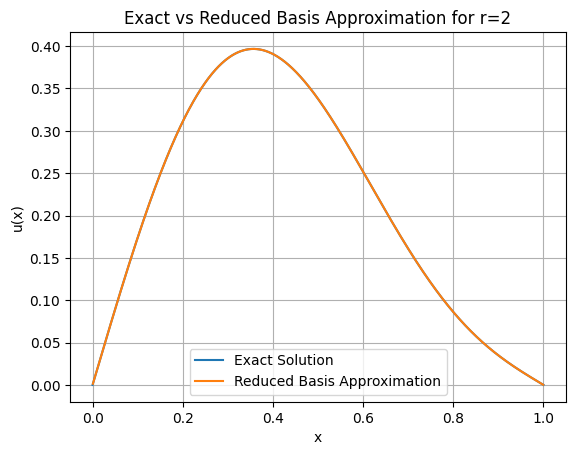

In [139]:
r=2
N_test = 100
V_r = V[:, :r]
A_r = V_r.T @ A0 @ V_r
A_r_inv = np.linalg.inv(A_r)
F_r1 = A_r_inv @ V_r.T @ F1
F_r2 = A_r_inv @ V_r.T @ F2
u_r = 1/(1+muD)*(mu1*F_r1 + mu2*F_r2)
u_approx = V_r @ u_r
x_values = [(i)/N for i in range(N+1)]
x_values_sol_exact = [(i)/1280 for i in range(1281)]
u_exact_values = [u_exact(x, mu1, mu2, muD) for x in x_values_sol_exact]
plt.plot(x_values_sol_exact, u_exact_values, label='Exact Solution')
plt.plot(x_values[1:N], u_approx, label='Reduced Basis Approximation')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Exact vs Reduced Basis Approximation for r={r}')
plt.legend()
plt.grid()
plt.show()


# Qui est V

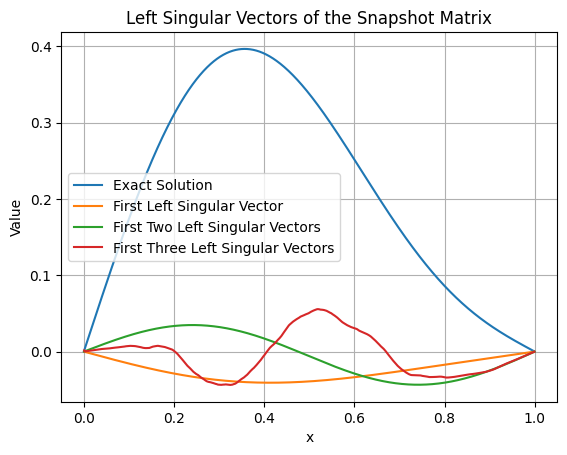

In [140]:
V1 = V[:, :1]
V2 = V[:, 1:2]
V3 = V[:, 2:3]
plt.plot(x_values_sol_exact, u_exact_values, label='Exact Solution')
plt.plot(x_values[1:N], V1, label='First Left Singular Vector')
plt.plot(x_values[1:N], V2, label='First Two Left Singular Vectors')
plt.plot(x_values[1:N], V3, label='First Three Left Singular Vectors')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Left Singular Vectors of the Snapshot Matrix')
plt.legend()
plt.grid()
plt.show()

V est enfaite "comme" dans un developpement en serie une base de fonction permettant de reconstruire la vrai solution

Pour tester interessons nous aux cas ou V contiendrait une base orthogonal des discrétisations entre 0 et 1 des polynomes de degres $deg_{max}$

(1279, 6)


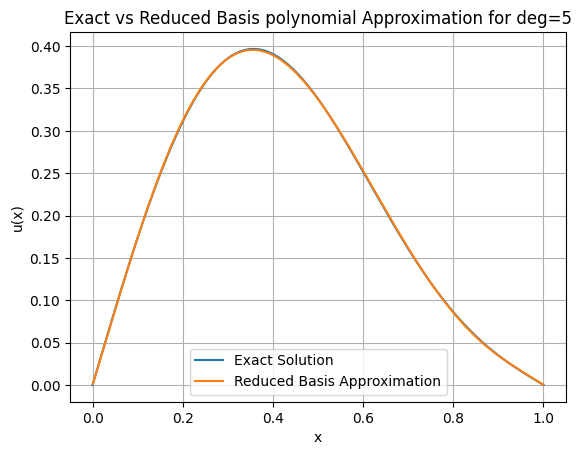

In [147]:
deg_max = 5
x = np.linspace(0, 1, N-1).reshape(-1, 1) # Vecteur colonne de 0 à 1

# 1. Création de la base de Vandermonde classique (1, x, x^2, x^3, x^4)
V_polynome = x ** np.arange(deg_max + 1)

# 2. Orthonormalisation via la décomposition QR
# La décomposition QR transforme une matrice en une matrice Q (orthonormale) 
# et R (triangulaire supérieure).
Q, R = np.linalg.qr(V_polynome)

# 3. Normalisation finale
# QR assure l'orthogonalité par rapport au produit scalaire discret (somme de produits).
# On multiplie par racine de N pour que la norme soit cohérente avec l'intervalle.
V_ortho = Q * np.sqrt(len(x))

print(V_ortho.shape) # Devrait être (N-1, 5)
N_test = 100


A_r_polynome= V_ortho.T @ A0 @ V_ortho
A_r_polynome_inv = np.linalg.inv(A_r_polynome)
F_r1 = A_r_polynome_inv @ V_ortho.T @ F1
F_r2 = A_r_polynome_inv @ V_ortho.T @ F2
u_r_polynome = 1/(1+muD)*(mu1*F_r1 + mu2*F_r2)
u_approx_polynome = V_ortho @ u_r_polynome
x_values = [(i)/N for i in range(N+1)]
x_values_sol_exact = [(i)/1280 for i in range(1281)]
u_exact_values = [u_exact(x, mu1, mu2, muD) for x in x_values_sol_exact]
plt.plot(x_values_sol_exact, u_exact_values, label='Exact Solution')
plt.plot(x_values[1:N], u_approx_polynome, label='Reduced Basis Approximation')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Exact vs Reduced Basis polynomial Approximation for deg={deg_max}')
plt.legend()
plt.grid()
plt.show()
